In [1]:
from beat_tracker.dataloading.datamodule import BeatTrackingDatamodule
from beat_tracker.utils.viz import show_spectrogram, show_beats_and_downbeats, show_beats_and_spectrogram

btdm = BeatTrackingDatamodule(target_seconds=10)
btdm.setup()

/homes/jpmg86/anaconda3/envs/MuMRVQ/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/homes/jpmg86/beat_tracker/beat_tracker/dataloading/datamodule.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '/import/c4dm-datasets/ballroom/BallroomData/VienneseWaltz/Media-104508.wav' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  annotations.loc[annotations['file_name'] == file, 'file_path'] = file_path


In [2]:
duummy = btdm.train_dataset[0]

[0.013000000000000001, 0.656, 1.297, 1.948, 2.617, 3.284, 3.943, 4.605, 5.274, 5.942, 6.588, 7.212, 7.836, 8.474, 9.14, 9.809, 10.478, 11.135, 11.778, 12.423, 13.08, 13.745, 14.408, 15.059, 15.71, 16.34, 16.982, 17.626, 18.271, 18.921, 19.562, 20.208, 20.852, 21.504, 22.168, 22.837, 23.505, 24.172, 24.836, 25.504, 26.148, 26.795, 27.438, 28.103, 28.75, 29.399, 30.047, 30.713]
[0.013000000000000001, 2.617, 5.274, 7.836, 10.478, 13.08, 15.71, 18.271, 20.852, 23.505, 26.148, 28.75]


/homes/jpmg86/beat_tracker/beat_tracker/dataloading/datasets.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio = torch.tensor(audio, dtype=torch.float32)


[0.013000000000000001, 0.656, 1.297, 1.948, 2.617, 3.284, 3.943, 4.605, 5.274, 5.942, 6.588, 7.212, 7.836, 8.474, 9.14, 9.809, 10.478, 11.135, 11.778, 12.423, 13.08, 13.745, 14.408, 15.059, 15.71, 16.34, 16.982, 17.626, 18.271, 18.921, 19.562, 20.208, 20.852, 21.504, 22.168, 22.837, 23.505, 24.172, 24.836, 25.504, 26.148, 26.795, 27.438, 28.103, 28.75, 29.399, 30.047, 30.713]
[0.013000000000000001, 2.617, 5.274, 7.836, 10.478, 13.08, 15.71, 18.271, 20.852, 23.505, 26.148, 28.75]


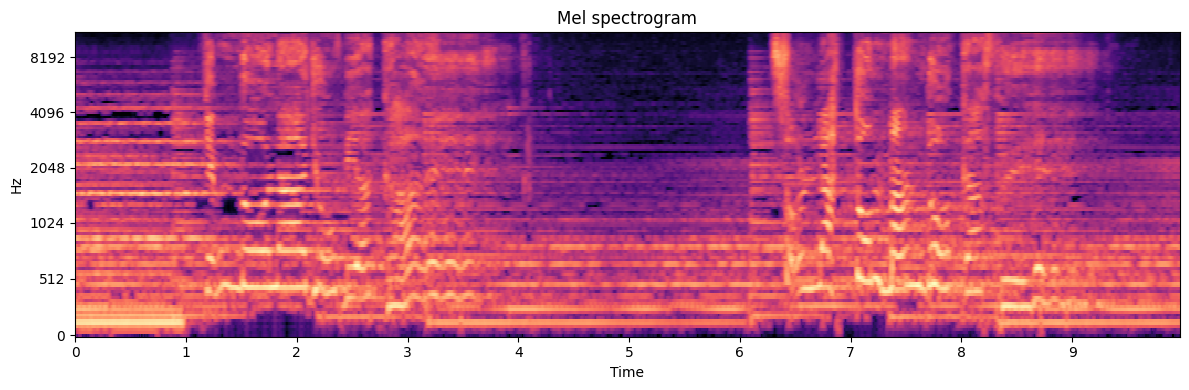

In [3]:
duummy = btdm.train_dataset.dummy_call()

show_spectrogram(
    spec= btdm.train_dataset[0]['spectrogram'].squeeze().numpy(),
)

[0.013000000000000001, 0.656, 1.297, 1.948, 2.617, 3.284, 3.943, 4.605, 5.274, 5.942, 6.588, 7.212, 7.836, 8.474, 9.14, 9.809, 10.478, 11.135, 11.778, 12.423, 13.08, 13.745, 14.408, 15.059, 15.71, 16.34, 16.982, 17.626, 18.271, 18.921, 19.562, 20.208, 20.852, 21.504, 22.168, 22.837, 23.505, 24.172, 24.836, 25.504, 26.148, 26.795, 27.438, 28.103, 28.75, 29.399, 30.047, 30.713]
[0.013000000000000001, 2.617, 5.274, 7.836, 10.478, 13.08, 15.71, 18.271, 20.852, 23.505, 26.148, 28.75]


/homes/jpmg86/beat_tracker/beat_tracker/dataloading/datasets.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio = torch.tensor(audio, dtype=torch.float32)


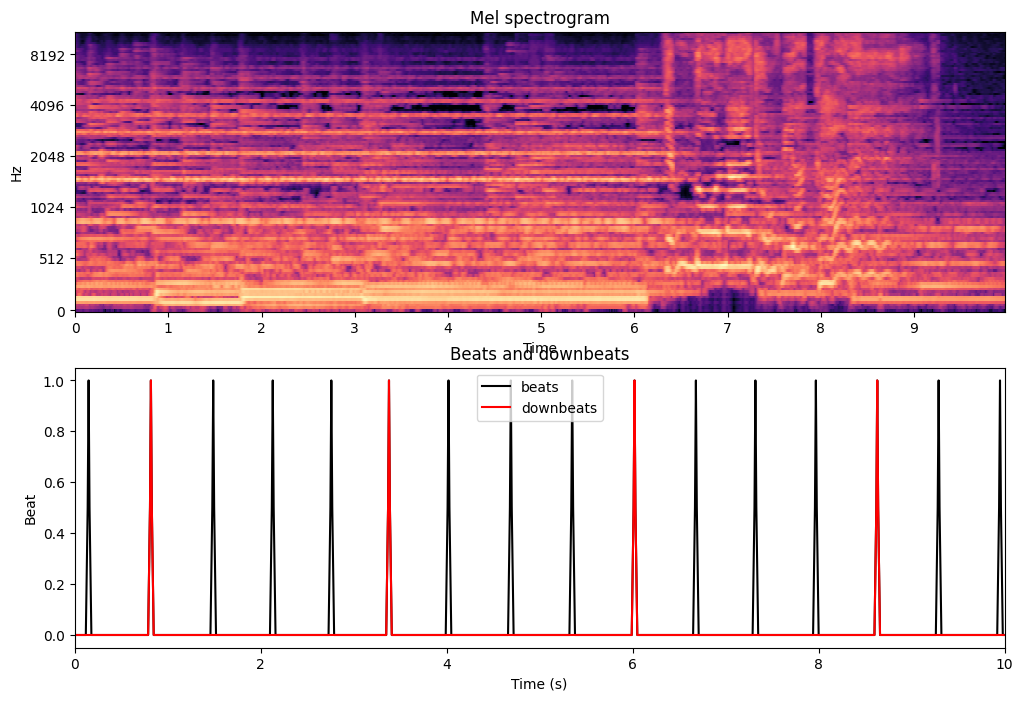

In [4]:
sample = btdm.train_dataset[0]

show_beats_and_spectrogram(
    spec = sample['spectrogram'].squeeze().numpy(),
    beats = sample['beats'].squeeze().numpy(),
    downbeats= sample['downbeats'].squeeze().numpy(),
)